# Research of weather checking data

### The objective of this study is to investigate what variables can well segment people's weather checking behavior and approach. The variables can be mainly categorized into two clusters, technology and demographics.

### Yijia Ding  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# renaming
new_colnames = ['respondent_ID',
        'check_daily',
        'method',
        'app_or_web',
        'smartwatch_freq',
        'age',
        'gender',
        'income',
        'region'
    ]
# grouping function
def counter(filepath = "C:/Users/yijia/desktop/yijiadng/weather-check.csv",
            col_names = new_colnames,
            keywords = ['income','method'],
            ):
    """
    Counter the number of different category combination, will return a Dataframe object.
    
    Author: Yijia Ding
    """
    df = pd.read_csv(
    filepath,
    header = 1,
    names = col_names
)

    # find representative values of each column
    nparray1 = np.unique(df[keywords[0]].values) 
    nparray2 = np.unique(df[keywords[1]].values)  
    
    ncol = len(nparray2)
    nrow = len(nparray1)
    
    ndf = np.zeros((nrow,ncol))
    for i,x in zip(nparray1,range(nrow)):
    
        for j,y in zip(nparray2, range(ncol)):
            if len(keywords) == 2:
                ndf[x,y] = df[
                        (df[keywords[0]] == i) 
                        &(df[keywords[1]] == j)
                        ].count()[0]
            elif len(keywords) == 3:
                ndf[x,y] = df[
                        (df[keywords[0]] == i) 
                        &(df[keywords[1]] == j)
                        &(df[keywords[2]] == 'Yes')
                        ].count()[0]
        
    ndf = pd.DataFrame(ndf)
    return ndf, nparray1, nparray2

In [3]:
xtics = ['Apps or Website','Internet Search','Local TV News','Newsletter','Newspaper','Radio Report','Weather Channel','Default App']

In [4]:
df = counter(keywords=['method','check_daily'])[0]
df = pd.concat([df,df[1]/(df[0]+df[1])],axis = 1,names = ['2'])
df = df.set_index(counter(keywords=['method','check_daily'])[1])
df.columns = ['No','Yes','Check_daily_mix']
df

,No,Yes,Check_daily_mix
-,5.0,6.0,0.545455
A specific website or app (please provide the answer),18.0,157.0,0.897143
Internet search,40.0,90.0,0.692308
Local TV News,41.0,148.0,0.783069
Newsletter,2.0,6.0,0.750000
Newspaper,8.0,24.0,0.750000
Radio weather,8.0,23.0,0.741935
The Weather Channel,17.0,122.0,0.877698
The default weather app on your phone,43.0,169.0,0.797170


### Segmentation by technology variables is firstly investigated. 

### Sample size of Newsletter, Newspaper and radio is rather small to draw any credible conclusions. In addition, respondents use these approaches have similar probability of chcking weather report daily. They are thus grouped as old-fashioned catagory.

In [5]:
df = counter(keywords=['method','check_daily'])[0]
ndf = df.T[[0,1,2,3]]
ndf = pd.concat([ndf, df.T[4]+df.T[5]+df.T[6]],axis = 1)
ndf = pd.concat([ndf, df.T[7]],axis = 1)
ndf = pd.concat([ndf, df.T[8]],axis = 1)
nindex = counter(keywords=['method','check_daily'])[1]
nindex = nindex[[0,1,2,3,4,7,8]]
nindex[4] = 'Old-fashioned: Newspaper, Newsletter, Radio weather' 
nindex = nindex[[0,2,4,3,5,6,1]]
ndf.columns = np.arange(7)
ndf = ndf.T
ndf = ndf.reindex([0,2,4,3,6,5,1])
ndf = ndf.set_index(nindex)
ndf = pd.concat([ndf, ndf[1]/(ndf[0]+ndf[1])],axis = 1)
ndf.columns = ['No','Yes','Check_daily_mix']
ndf

,No,Yes,Check_daily_mix
-,5.0,6.0,0.545455
Internet search,40.0,90.0,0.692308
"Old-fashioned: Newspaper, Newsletter, Radio weather",18.0,53.0,0.746479
Local TV News,41.0,148.0,0.783069
The Weather Channel,43.0,169.0,0.797170
The default weather app on your phone,17.0,122.0,0.877698
A specific website or app (please provide the answer),18.0,157.0,0.897143


### A large proportion of respondents use a specific website or app or the default app on phone to check weather, and the mix of people who check weather daily is the largest among all. Since weather report can be accessed from Internet with a simple click, it provides great convenience to people who will check daily weather report. This is self-explanatory. 

### Meanwhile, although people has increasingly more advanced methods to access weather report, the number of respondents who watch the weather channel still takes the lead. The Local TV News category also has a large number users. However, as for those old-fashioned approaches, they have the least number of users. Their loss of users may be because they can neither provide a detailed report as TV channels nor can be as easily accessible as the Internet.


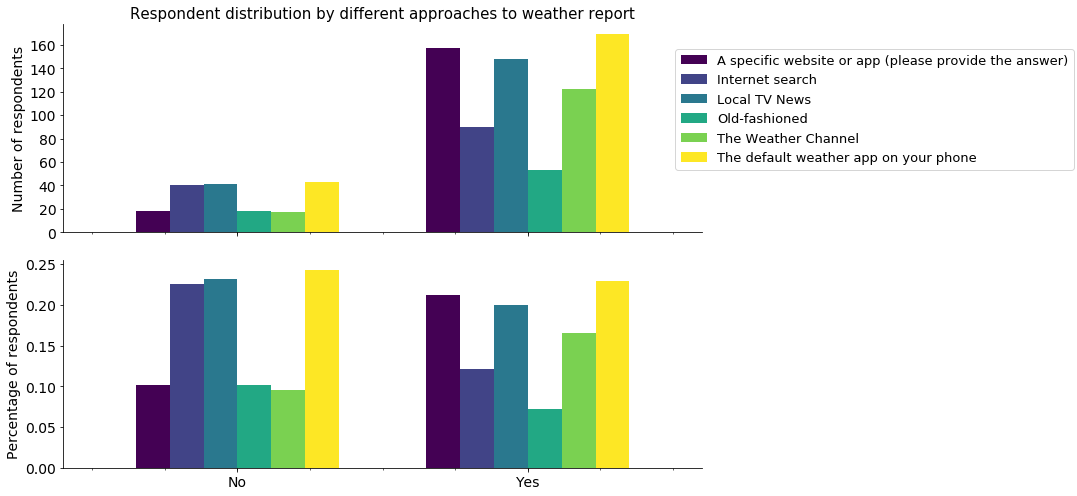

In [6]:
# check_daily vs method
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex = True, squeeze=True
                         )
df = counter(keywords=['check_daily','method'])[0]
df = df.T
df = df.drop(df.index[0])
ndf = df.T[[1,2,3]]
ndf = pd.concat([ndf,df.T[4]+df.T[5]+df.T[6]],axis =1)
ndf = pd.concat([ndf,df.T[[7,8]]],axis =1)
# to percentage
perc = ndf.T/ndf.sum(axis = 1)
perc = perc.T
sub1 = perc.plot.bar(ax = axes[1], legend = False,
                    colormap='viridis',
                    fontsize = 14,figsize = (10,7),width = 0.7
                    )
sub0 = ndf.plot.bar(ax = axes[0], legend = False,
                    colormap='viridis',
                    fontsize = 14,figsize = (10,7),width = 0.7,
                    title = 'Respondent distribution by different approaches to weather report')
sub1.set_xticklabels(counter(keywords=['check_daily','method'])[1],rotation = 0)

leg = counter(keywords=['check_daily','method'])[2]
leg = np.delete(leg, [0,4,5])
leg[3] = 'Old-fashioned'
fig.legend(leg, loc =1,bbox_to_anchor = (1.5,0.9),fontsize=13)
axes[1].set_ylabel('Percentage of respondents',fontsize=14)
axes[0].set_ylabel('Number of respondents',fontsize=14)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[0].title.set_size(15)
fig.tight_layout()

### As we can see from the distribution of users of diffrerent weather approaches, among respondents who will not typically check a daily weather report, a small proportion of them would use a specific website or app to access weather report. On the contratry, a relatively large proportion of them would use Internet search to access weather report. The possible reason is that people who will not typically check a daily weather report will also not care about which website to use to access weather report. Search engine can provide a list of weather report website. But for people who occasionally check weather report, they would randomly pick the most accessible website in the search result to check weather. In addition, as we can see in another group of respondents, the proportion of respondents who use a specific website or app to check weather is larger than that of respondents who use Internet search. That is to say, peopo who will typically check a daily weather report could have a specific preference for the website they usually use. 

### In addition ot old-fashioned approaches, other buckets can be also grouped to broader categories based on their traits. Each category can stand for different stages of scientific development. According to the time when these approaches are invented, from current to earlier:
### (1) Advanced: A specific website or app, Internet search, default app on phone; 
### (2) Conventional:  Local TV News, The weather channel;
### (3) Old-fashioned:  Newsletter, Newspaper, Radio weather.


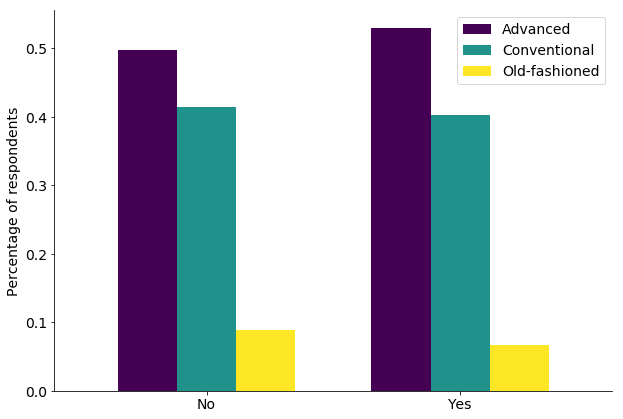

In [7]:
df = counter(keywords=['check_daily','method'])[0]
df = df.T
df = df.drop(df.index[0])
ndf = df.T[1]+df.T[8]+df.T[2]
ndf = pd.concat([ndf,df.T[3]+df.T[8]],axis =1)
ndf = pd.concat([ndf,df.T[4]+df.T[5]+df.T[6]],axis =1)
perc = ndf.T/ndf.sum(axis = 1)
# to percentage
plot = perc.T.plot.bar(
                    colormap='viridis',
                    fontsize = 14,figsize = (10,7),width = 0.7
                    )

plot.set_xticklabels(counter(keywords=['check_daily','method'])[1],rotation = 0)

leg = counter(keywords=['check_daily','method'])[2]
leg = np.delete(leg, [0,1,2,3])
plot.legend(['Advanced','Conventional','Old-fashioned'],fontsize = 14)
plot.set_ylabel('Percentage of respondents',fontsize=14)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)

### The distribution of users of checking approaches between two groups is very similar to each other. No matter in which group, users of advanced approach takes up the largest proportion while convential approach takes the second place. Therefore, weather report on TV channels have been affected by newly developed weather report approaches to some extent.

In [8]:
df = counter(keywords=['app_or_web','check_daily'])[0]
df = pd.concat([df,df[1]/(df[0]+df[1])],axis = 1,names = ['2'])
df = df.set_index(counter(keywords=['app_or_web','check_daily'])[1])
df.columns = ['No','Count','Check_daily_mix']
df = df.drop(columns = ['No'], axis = 1)
df

,Count,Check_daily_mix
Weather underground,1.0,1.000000
-,588.0,0.781915
1 weather,1.0,1.000000
1weather,1.0,1.000000
AccuWeather,2.0,1.000000
AccuWeather App,1.0,1.000000
AccuWeather or Weather Underground,1.0,1.000000
Accuweather,10.0,1.000000
App on Iphone,0.0,0.000000
Apple Weather App,1.0,1.000000


### Response varies a lot. Sample size of each group is too small to make a difference.

In [9]:
df = counter(keywords=['smartwatch_freq','check_daily'])[0]
df = pd.concat([df,df[1]/(df[0]+df[1])],axis = 1,names = ['2'])
df = df.set_index(counter(keywords=['smartwatch_freq','check_daily'])[1])
df.columns = ['No','Count','Check_daily_mix']
df = df.drop(columns = ['No'], axis = 1)
df

,Count,Check_daily_mix
-,6.0,0.545455
Somewhat likely,203.0,0.740876
Somewhat unlikely,48.0,0.657534
Very likely,333.0,0.922438
Very unlikely,155.0,0.745192


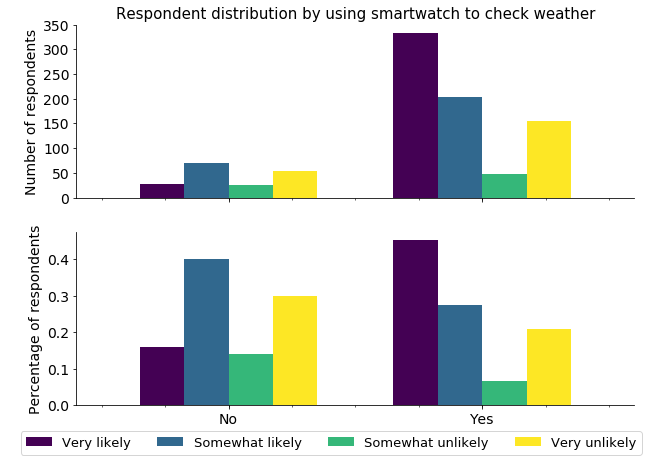

In [10]:
# smartwatch vs check daily
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex = True, squeeze=True
                         )
df = counter(keywords=['check_daily','smartwatch_freq'])[0]
df = df.T
df = df.drop(df.index[0]).reindex([3,1,2,4])
# to percentage
perc = df/df.sum(axis = 0)
sub1 = perc.T.plot.bar(ax = axes[1], legend = False,
                    colormap='viridis',
                    fontsize = 14,figsize = (10,7),width = 0.7
                    )
sub0 = df.T.plot.bar(ax = axes[0], legend = False,
                    colormap='viridis',
                    fontsize = 14,figsize = (10,7),width = 0.7,
                    title = 'Respondent distribution by using smartwatch to check weather')
sub1.set_xticklabels(counter(keywords=['check_daily','smartwatch_freq'])[1],rotation = 0)

leg = counter(keywords=['check_daily','smartwatch_freq'])[2]
leg = np.delete(leg, 0)
leg = leg[[2,0,1,3]]
fig.legend(leg, loc = 'upper center',bbox_to_anchor = (0.46,0.08), fontsize=13,ncol = 4)
axes[1].set_ylabel('Percentage of respondents',fontsize=14)
axes[0].set_ylabel('Number of respondents',fontsize=14)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[0].title.set_size(15)

### Among respondents who typically check weather report daily, a large proportion of them indicated that they are very likely to use smartwatch to check weather. Among respondents in another group, however, only a small proportion potentially use smartwatch to check weather. Hence, we can infer that people who typically check weather report daily are more likely to use smartwatch to check weather.

### As for other three categories, their distribution between two x-axis groups are similar, the main difference comes from people who are very likely to use smart watch to check weather. 
### Smartwatch is not solely designed for checking weather report. It is one of the attched functions for smartwatch. It is unikely that the user will buy smartwatch just for checking weather and it takes time for the user to form the habit of using smartwatch to check weather especially when the user has been used to using other devices like mobile phone, computer or TV. People would not turn to use smartwatch to check weather only because they check weather every day.

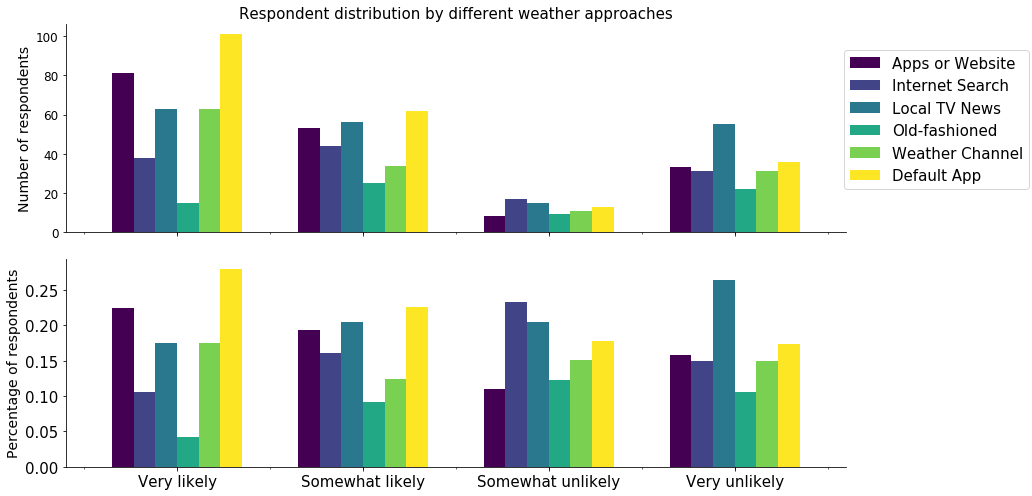

In [11]:
# smartwatch vs. method (groupby)
df = counter(keywords=['smartwatch_freq','method'])[0]
df = df.drop(df.index[0])
df = df.T
df = df.drop(df.index[0])
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex = True, squeeze=True
                         )
leg = ['Apps or Website','Internet Search','Local TV News','Old-fashioned','Weather Channel','Default App']
ndf = df.T[[1,2,3]]
ndf = pd.concat([ndf,df.T[4]+df.T[5]+df.T[6]],axis =1)
ndf = pd.concat([ndf,df.T[[7,8]]],axis =1)
ndf = ndf.reindex([3,1,2,4])
perc = ndf.T/ndf.sum(axis = 1)
sub1 = perc.T.plot.bar(ax = axes[1], legend = False,
                    colormap='viridis',
                    fontsize = 15,
                    width = 0.7, figsize = (10,6),
                    )
sub0 = ndf.plot.bar(ax = axes[0], legend = False,
                    colormap='viridis',
                    fontsize = 12, figsize = (12,7),width = 0.7,
                    title =  'Respondent distribution by different weather approaches')
ntics = counter(keywords=['smartwatch_freq','method'])[1]
ntics = np.delete(ntics,0) 
ntics = ntics[[2,0,1,3]]
sub1.set_xticklabels(ntics,rotation = 0)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].set_ylabel('Percentage of respondents',fontsize=14)
axes[0].set_ylabel('Number of respondents',fontsize=14)
fig.legend(leg, bbox_to_anchor = (1.2,0.9),fontsize=15)
axes[0].title.set_size(15)
fig.tight_layout()

### The proportion of respondents who use default app to check weather is negatively correlated with the probability of using smartwatch to check weather. The mix of respondents who watch local TV news to check weather has a positive correlation with the probability of using smartwatch to check weather. This is reasonable since individuals who are more likely to accept a new approach would be more adaptive of another. 

In [12]:
df = counter(keywords=['age','check_daily'])[0]
df = pd.concat([df,df[1]/(df[0]+df[1])],axis = 1,names = ['2'])
df = df.set_index(counter(keywords=['age','check_daily'])[1])
df.columns = ['No','Count','Check_daily_mix']
df = df.drop(columns = ['No'], axis = 1)
df

,Count,Check_daily_mix
-,7.0,0.583333
18 - 29,120.0,0.681818
30 - 44,160.0,0.788177
45 - 59,234.0,0.841727
60+,224.0,0.868217


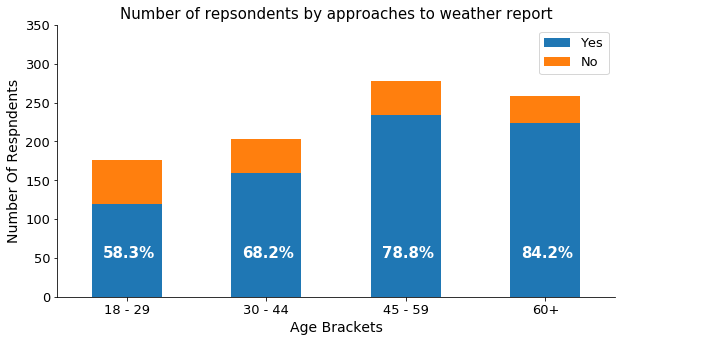

In [13]:
df = counter(keywords=['age','check_daily'])[0]
perc = round(100*df[1]/(df[0]+df[1]),1).values
df = df.drop(df.index[0]).reindex([1,0], axis="columns")
plot = df.plot(kind = 'bar',
               stacked = True,
               fontsize = 13,
               ylim = (0,350),
               title = 'Number of repsondents by approaches to weather report',
               figsize= (10,5))
plot.title.set_fontsize(15)
tics = counter(keywords=['age','check_daily'])[1]
tics = np.delete(tics,0)
plot.set_xticklabels(tics,rotation = 0)
plot.set_ylabel('Number Of Respndents',fontsize=14)
plot.set_xlabel('Age Brackets',fontsize=14)
plot.legend(['Yes','No'], bbox_to_anchor=(1,1),fontsize=13)
for i in range(len(perc)):
    plot.annotate(str(perc[i])+'%',
                  xy=(3, 3), xytext=(-0.17+i, 50),
                  size = 15,color = 'white',fontweight='bold')
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)

### So far, the relationship between weather checking behavior and technology is explored. Another important qeustion is that how does demographics affect weather checking, such as age, income as residence region.

### The above plot shows that elder people tend to typically check a daily weather report as the percentage increases with age. Also, the number of respondents in 18-29 age bracket is the smallest. They could be somewhat unlikely to join a survey related to checking weather. 

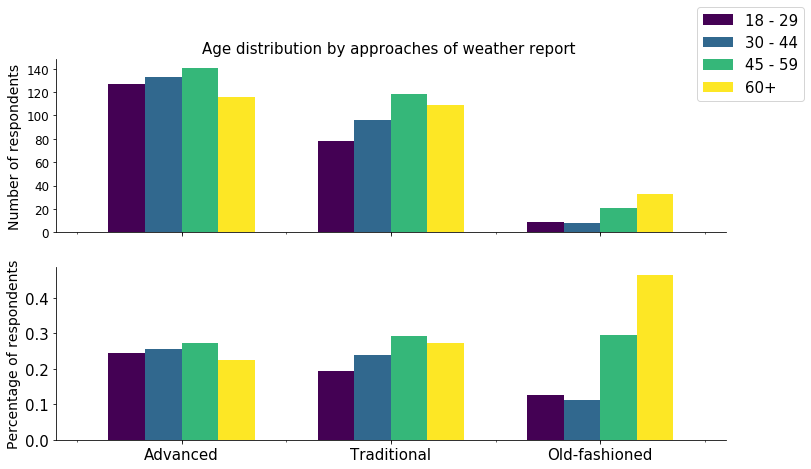

In [14]:
# age vs. method (groupby)
df = counter(keywords=['age','method'])[0]
df = df.drop(df.index[0])
df = df.T
df = df.drop(df.index[0])
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex = True, squeeze=True
                         )
ntics = ['Advanced', 'Traditional', 'Old-fashioned']
ndf = df.T[1]+df.T[8]+df.T[2]
ndf = pd.concat([ndf,df.T[3]+df.T[8]],axis =1)
ndf = pd.concat([ndf,df.T[4]+df.T[5]+df.T[6]],axis =1)
perc = ndf/ndf.sum(axis = 0)
sub1 = perc.T.plot.bar(ax = axes[1], legend = False,
                    colormap='viridis',
                    fontsize = 15,
                    width = 0.7, figsize = (10,6),
                    )
sub0 = ndf.T.plot.bar(ax = axes[0], legend = False,
                    colormap='viridis',
                    fontsize = 12, figsize = (12,7),width = 0.7,
                    title =  'Age distribution by approaches of weather report ')

sub1.set_xticklabels(ntics,rotation = 0)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].set_ylabel('Percentage of respondents',fontsize=14)
axes[0].set_ylabel('Number of respondents',fontsize=14)

leg = counter(keywords=['age','method'])[1]
leg = np.delete(leg, 0)
fig.legend(leg, loc = 'upper right',fontsize=15)
axes[0].title.set_size(15)

### Considering the timeline of weather report approaches development, I directly classified these methods into three categories as before. 

### The percentage and number of people aged 18 - 44 in advanced group is larger than that in traditional and old-fashioned groups. Advanced technology is generally easier to be accepted by people aged 18 - 44.

### In addition, even though the sample size of  Old-fashioned approach is small, we can see people over 60 takes up a large proportion in the group. A large number of people who still stick to old-fashioned approach could be in the over 60 age bracket.

In [15]:
df = counter(keywords=['gender','check_daily'])[0]
df = pd.concat([df,df[1]/(df[0]+df[1])],axis = 1,names = ['2'])
df = df.set_index(counter(keywords=['gender','check_daily'])[1])
df.columns = ['No','Count','Check_daily_mix']
df = df.drop(columns = ['No'], axis = 1)
df

,Count,Check_daily_mix
-,7.0,0.583333
Female,420.0,0.796964
Male,318.0,0.819588


### The mix of people who check weather daily is not well segmented by gender group.

In [16]:
df = counter(keywords=['income','check_daily'])[0]
df = pd.concat([df,df[1]/(df[0]+df[1])],axis = 1,names = ['2'])
df = df.set_index(counter(keywords=['income','check_daily'])[1])
df.columns = ['No','Count','Check_daily_mix']
df = df.drop(columns = ['No'], axis = 1)
df.reindex([0,1,7,8,9,2,3,4,5,6,10,11])
df

,Count,Check_daily_mix
"$0 to $9,999",33.0,0.733333
"$10,000 to $24,999",64.0,0.790123
"$100,000 to $124,999",83.0,0.798077
"$125,000 to $149,999",35.0,0.714286
"$150,000 to $174,999",33.0,0.846154
"$175,000 to $199,999",19.0,0.826087
"$200,000 and up",52.0,0.896552
"$25,000 to $49,999",108.0,0.818182
"$50,000 to $74,999",90.0,0.818182
"$75,000 to $99,999",88.0,0.846154


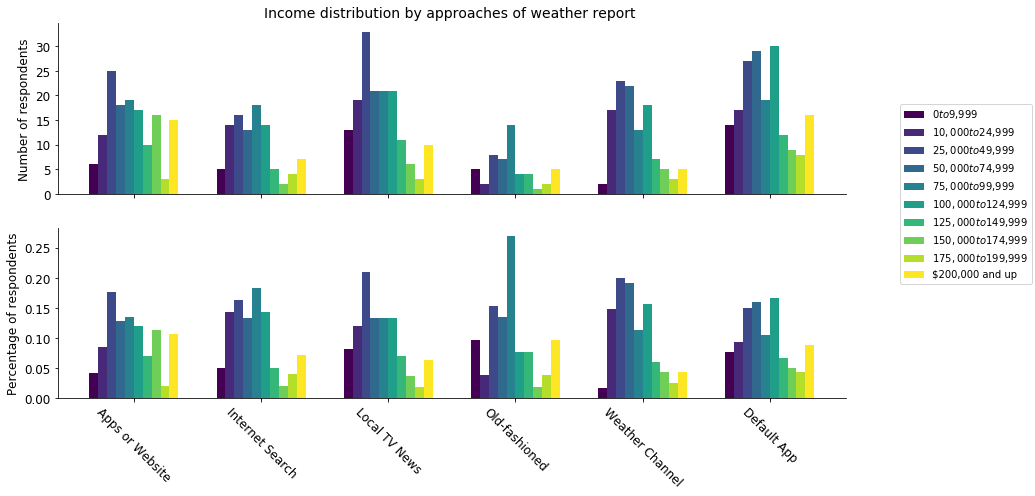

In [17]:
# income vs. method 
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex = True, squeeze=True
                         )
df = counter(keywords=['income','method'])[0]
df = df.drop(df.index[[10,11]]).reindex([0,1,7,8,9,2,3,4,5,6])
df = df.T
df = df.drop(df.index[0])
ndf = df.T[[1,2,3]]
ndf = pd.concat([ndf,df.T[4]+df.T[5]+df.T[6]],axis =1)
ndf = pd.concat([ndf,df.T[[7,8]]],axis =1)
perc = ndf/ndf.sum(axis = 0)
sub1 = perc.T.plot.bar(ax = axes[1], legend = False,
                    colormap='viridis',
                    fontsize = 12,figsize = (12,7),width = 0.7
                    )
sub0 = ndf.T.plot.bar(ax = axes[0], legend = False,
                    colormap='viridis',
                    fontsize = 12, figsize = (12,7),width = 0.7,
                    title = 'Income distribution by approaches of weather report ')
ntics = ['Apps or Website','Internet Search','Local TV News','Old-fashioned','Weather Channel','Default App']
sub1.set_xticklabels(ntics,rotation = -45)
leg = counter(keywords=['income','method'])[1]
leg = np.delete(leg, [10,11])
leg = leg[[0,1,7,8,9,2,3,4,5,6]]
fig.legend(leg,loc=7,bbox_to_anchor = (1.2,0.6))
axes[1].set_ylabel('Percentage of respondents',fontsize=12)
axes[0].set_ylabel('Number of respondents',fontsize=12)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[0].title.set_size(14)
fig.tight_layout()
plt.subplots_adjust(hspace = 0.2)

### The distribution patterns are similar among income groups. It seems that there is no strong correlation between income and weather report approach. 

In [18]:
df = counter(keywords=['region','check_daily'])[0]
df = pd.concat([df,df[1]/(df[0]+df[1])],axis = 1,names = ['2'])
df = df.set_index(counter(keywords=['region','check_daily'])[1])
df.columns = ['No','Count','Check_daily_mix']
df = df.drop(columns = ['No'], axis = 1)
df

,Count,Check_daily_mix
-,17.0,0.548387
East North Central,121.0,0.858156
East South Central,38.0,0.926829
Middle Atlantic,92.0,0.884615
Mountain,57.0,0.791667
New England,49.0,0.942308
Pacific,129.0,0.697297
South Atlantic,113.0,0.738562
West North Central,44.0,0.814815
West South Central,85.0,0.904255


### As discussed on "FiveThirtyEight" website, people in New England are likely to typically check a daily weather report because of harsh weather. While weather in Pacific is more predictable, so people there are less likely to check weather. 

### To further explore patterns related to different regions, It is discovered that weather checking approaches have different popularity across regions.

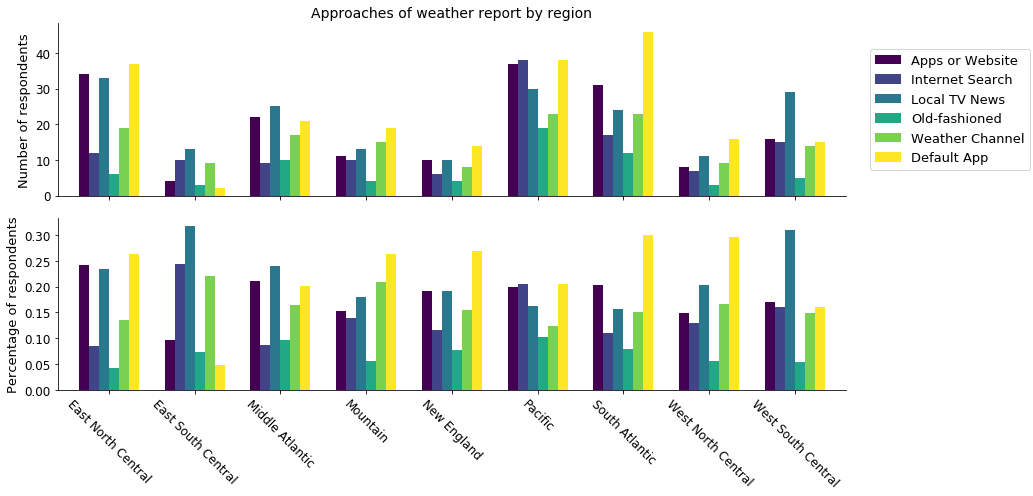

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex = True, squeeze=True
                         )
df = counter(keywords=['region','method'])[0]
df = df.drop(df.index[0])
df = df.T
df = df.drop(df.index[0])
ndf = df.T[[1,2,3]]
ndf = pd.concat([ndf,df.T[4]+df.T[5]+df.T[6]],axis =1)
ndf = pd.concat([ndf,df.T[[7,8]]],axis =1)
perc = ndf.T/ndf.sum(axis = 1)

sub1 = perc.T.plot.bar(ax = axes[1], legend = False,
                    colormap='viridis',
                    fontsize = 12,figsize = (12,7),width = 0.7
                    )
sub0 = ndf.plot.bar(ax = axes[0], legend = False,
                    colormap='viridis',
                    fontsize = 12, figsize = (12,7),width = 0.7,
                    title = 'Approaches of weather report by region')
leg = ['Apps or Website','Internet Search','Local TV News','Old-fashioned','Weather Channel','Default App']
ntics = counter(keywords=['region','method'])[1]
ntics = np.delete(ntics,0)
sub1.set_xticklabels(ntics,rotation = -45)
fig.legend(leg,bbox_to_anchor = (1.2,0.9),fontsize = 13)
axes[1].set_ylabel('Percentage of respondents',fontsize=13)
axes[0].set_ylabel('Number of respondents',fontsize=13)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[0].title.set_size(14)
fig.tight_layout()

### From above plot, default App dominates in most region, but Local TV News is most popular in East South Central, Middle Atlantic as well as West South Central regions.

## Conclusion:
### People's attitude towards new technology and their demographic data is predictive of weather checking behavior. This is an very interesting question. A logistic regression model is built to predict whether an individual checks weather daily using findings of this report. Please refer to R Markdown for details of the model.